# Content Based Recommendation Systems

A recommendation system (or recommender system) is a class of machine learning that uses data to help predict, narrow down, and find what people are looking for among an exponentially growing number of options.

Recommendation systems are divided into three:

* Collaborative Filtering
* Content Based RS
* Hybrid Models

In this notebook we are going to discuss Content Based RS.

## Content Based Recommendation Systems

* Content-based filtering methods are based on a description of the item and a profile of the user's preferences. These methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not on the user. Content-based recommenders treat recommendation as a user-specific classification problem and learn a classifier for the user's likes and dislikes based on an item's features.
* It is used to models such as TF_IDF and Word2Vec in order to capture similarity.
* It is very powerful that a item adding newly is recommend.  
* A key issue with content-based filtering is whether the system can learn user preferences from users' actions regarding one content source and use them across other content types. When the system is limited to recommending content of the same type as the user is already using, the value from the recommendation system is significantly less than when other content types from other services can be recommended.
* To overcome this, most content-based recommender systems now use some form of the hybrid system.
* Content-based recommender systems can also include opinion-based recommender systems.

## What is TF-IDF?

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

TF-IDF is a weight factor which a word display important into document and had been calculated with statistics method. TF-IDF method use to a lot domains (sentiment analysis, RS, stop words filterin etc.) This method is divided into two. Fistly we will analyze Term Frequency(TF).

### Term Frequency

In document d, the frequency represents the number of instances of a given word t. Therefore, we can see that it becomes more relevant when a word appears in the text, which is rational. Since the ordering of terms is not significant, we can use a vector to describe the text in the bag of term models. For each specific term in the paper, there is an entry with the value being the term frequency.
The weight of a term that occurs in a document is simply proportional to the term frequency.

### Inverse Document Frequency

Mainly, it tests how relevant the word is. The key aim of the search is to locate the appropriate records that fit the demand. Since tf considers all terms equally significant, it is therefore not only possible to use the term frequencies to measure the weight of the term in the paper. First, find the document frequency of a term t by counting the number of documents containing the term:

**TF-IDF method used as multipy TF value and IDF value. (TF * IDF)**

I have applied this method in my model. And I have found the similarity in between with cosine distance.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For Text

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


# Capture similarity 
from sklearn.metrics.pairwise import linear_kernel

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/musicaldata/musicaldata.csv


Let's get to know our dataset.

In [3]:


data=pd.read_csv("/kaggle/input/musicaldata/musicaldata.csv")
data.head(4000)

,track id,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mother tongue
0,1,classical,0,1,0,0,0,0,1,1,0,3,1,0,21,1,English
1,1,classical,0,0,0,1,0,0,0,0,0,3,0,1,41,1,Dutch
2,1,classical,0,0,0,1,0,0,0,0,1,3,0,0,24,1,English
3,1,classical,0,0,0,0,1,0,0,0,0,3,0,0,32,0,Spanish
4,1,classical,0,0,0,1,1,0,0,0,0,4,0,1,21,0,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,149,rock,0,0,1,0,1,0,0,0,1,4,1,0,25,1,Dutch
3996,149,rock,0,0,0,1,1,0,0,0,1,3,1,0,24,0,French
3997,150,rock,0,0,0,0,0,0,0,1,0,3,0,1,38,0,English
3998,150,rock,0,1,0,0,1,0,0,0,0,3,0,0,23,0,Dutch


> I wanted to make a suggestion depends on the cast members, description and "listed_in" which contains the shows type but there is another column named "type" it is a bit confusing I know. >

Drop nan values on these columns to make a proper matrix which contains linear_kernel values of selected strings.

In [4]:
data.shape

(8407, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8407 entries, 0 to 8406
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   track id            8407 non-null   int64 
 1    genre              8407 non-null   object
 2    amazement          8407 non-null   int64 
 3    solemnity          8407 non-null   int64 
 4    tenderness         8407 non-null   int64 
 5    nostalgia          8407 non-null   int64 
 6    calmness           8407 non-null   int64 
 7    power              8407 non-null   int64 
 8    joyful_activation  8407 non-null   int64 
 9    tension            8407 non-null   int64 
 10   sadness            8407 non-null   int64 
 11   mood               8407 non-null   int64 
 12   liked              8407 non-null   int64 
 13   disliked           8407 non-null   int64 
 14   age                8407 non-null   int64 
 15   gender             8407 non-null   int64 
 16   mother tongue      8407

In [6]:
data.isnull().sum()

track id              0
 genre                0
 amazement            0
 solemnity            0
 tenderness           0
 nostalgia            0
 calmness             0
 power                0
 joyful_activation    0
 tension              0
 sadness              0
 mood                 0
 liked                0
 disliked             0
 age                  0
 gender               0
 mother tongue        0
dtype: int64

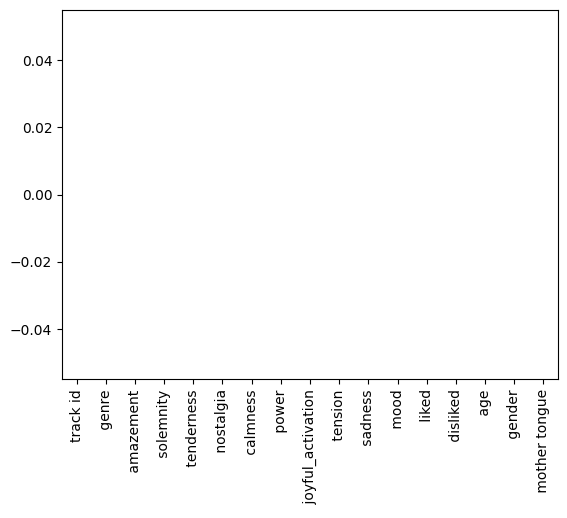

In [7]:
data.dropna(inplace = True)
data.isnull().sum().plot.bar()
plt.show()

In [8]:
data = data.drop(['track id'], axis = 1)


data

,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mother tongue
0,classical,0,1,0,0,0,0,1,1,0,3,1,0,21,1,English
1,classical,0,0,0,1,0,0,0,0,0,3,0,1,41,1,Dutch
2,classical,0,0,0,1,0,0,0,0,1,3,0,0,24,1,English
3,classical,0,0,0,0,1,0,0,0,0,3,0,0,32,0,Spanish
4,classical,0,0,0,1,1,0,0,0,0,4,0,1,21,0,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,pop,1,1,0,0,0,0,1,0,0,3,0,0,26,1,Russian
8403,pop,0,0,0,1,0,0,1,0,1,3,0,1,29,0,Russian
8404,pop,0,0,0,0,0,0,0,1,0,4,0,1,34,1,Polish
8405,pop,1,0,0,0,0,0,1,1,0,5,0,0,39,1,French


In [9]:
data = data.sort_values(by=[' mood'], ascending=False)
data

,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mother tongue
5883,electronic,0,0,0,0,1,0,0,0,0,5,1,0,53,0,English
6562,pop,0,0,0,0,0,0,0,1,0,5,0,1,25,1,English
4458,rock,0,0,1,0,0,0,0,0,0,5,0,1,38,0,Dutch
1178,classical,0,0,0,0,0,0,0,0,1,5,0,0,33,0,Russian
6543,electronic,0,0,0,0,0,1,1,0,0,5,1,0,54,0,Estonian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,electronic,0,0,0,0,0,0,1,0,0,1,1,0,20,1,French
5332,electronic,0,0,1,0,1,0,0,0,0,1,0,0,25,0,English
2031,classical,0,0,0,1,1,0,0,0,0,1,0,0,25,1,Russian
2345,classical,0,0,0,1,0,0,1,0,0,1,1,0,33,0,Russian


In [10]:
%%capture
song_vectorizer = CountVectorizer(lowercase=False)
song_vectorizer.fit(data[' genre'])

In [11]:
data = data.sort_values(by=[' mood'], ascending=False).head(8407)

In [12]:
def get_similarities(song_genre, datas):

# Getting vector for the input song.
    text_array1 = song_vectorizer.transform(datas[datas[' genre']==song_genre][' mother tongue']).toarray()
    num_array1 = datas[datas[' genre']==song_genre].select_dtypes(include=np.number).to_numpy()

# We will store similarity for each row of the dataset.
    sim = []
    for idx, row in data.iterrows():
	    genre = row[' genre']
	
	# Getting vector for current song.
	    text_array2 = song_vectorizer.transform(datas[datas[' genre']==genre][' mother tongue']).toarray()
	    num_array2 = datas[datas[' genre']==genre].select_dtypes(include=np.number).to_numpy()

	# Calculating similarities for text as well as numeric features
	    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
	    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
	    sim.append(text_sim + num_sim)
	
    return sim

In [13]:
def recommend_songs(song_genre, datas=data):
  # Base case
   if data[data[' genre'] == song_genre].shape[0] == 0:
        print('This song is not so popular')
     
        for song in datas.sample(n=5)[' genre'].values:
            print(song)
        return
   
   datas['similarity_factor'] = get_similarities(song_genre, datas)
 
   datas.sort_values(by=['similarity_factor', ' mood'],
                   ascending = [False, False],
                   inplace=True)
   
  # First song will be the input song itself as the similarity will be highest.
   display(datas[[' genre', ' age', ' mother tongue']][2:7])

In [14]:
recommend_songs('classical')

,genre,age,mother tongue
246,classical,45,Korean
528,classical,46,English
85,classical,34,Portuguese
580,classical,46,English
587,classical,55,Dutch


In [21]:

import streamlit as st
st.header("music genre based age Recommendation System" )

conda 24.9.0
^C


ModuleNotFoundError: No module named 'streamlit'

In [ ]:
genre = data['genre'].values
genre

In [ ]:
if st.button('if st.button('Show Recommendation'):
      recommended_age = recommend_songs(song_genre, datas=data)
      recommended_age

In this above. My model brought the recommendations I wanted to bring acording to the mood of the songs of different genres . Firstly it brought to Transformers movies.

# Conclusion

* In this notebook. I worked to explain content based recommendation system.
* Content based RS models are powerful in new item recommendation. 
* In general it is used TF-IDF and Word2Vec model while content based RS designs.
* TF-IDF method is the method which explains words frequency in document.
* It can be created a recommendation model by using cosine distance with the aid of TF-IDF weights.